In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore all warnings
warnings.filterwarnings("ignore")
# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="This is a specific warning to ignore")

In [2]:
df = pd.concat([
    pd.read_csv(r'customer_churn_dataset-training-master.csv'),
    pd.read_csv(r'customer_churn_dataset-testing-master.csv')
], axis=0)

df.reset_index(drop=True, inplace=True)

# Drop the CustomerID column (to avoid using meaningless identifiers in the model)
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

# Drop any rows with missing values
df = df.dropna()

# Inspect the dataset structure
print("First 5 Rows of the Dataset:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (e.g., fill with median for numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


First 5 Rows of the Dataset:
    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0  Female    39.0             14.0            5.0           18.0   
1  65.0  Female    49.0              1.0           10.0            8.0   
2  55.0  Female    14.0              4.0            6.0           18.0   
3  58.0    Male    38.0             21.0            7.0            7.0   
4  23.0    Male    32.0             20.0            5.0            8.0   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0          Standard          Annual        932.0              17.0    1.0  
1             Basic         Monthly        557.0               6.0    1.0  
2             Basic       Quarterly        185.0               3.0    1.0  
3          Standard         Monthly        396.0              29.0    1.0  
4             Basic         Monthly        617.0              20.0    1.0  

Summary Statistics:
                 Age         Tenure  Usage Freque

In [3]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


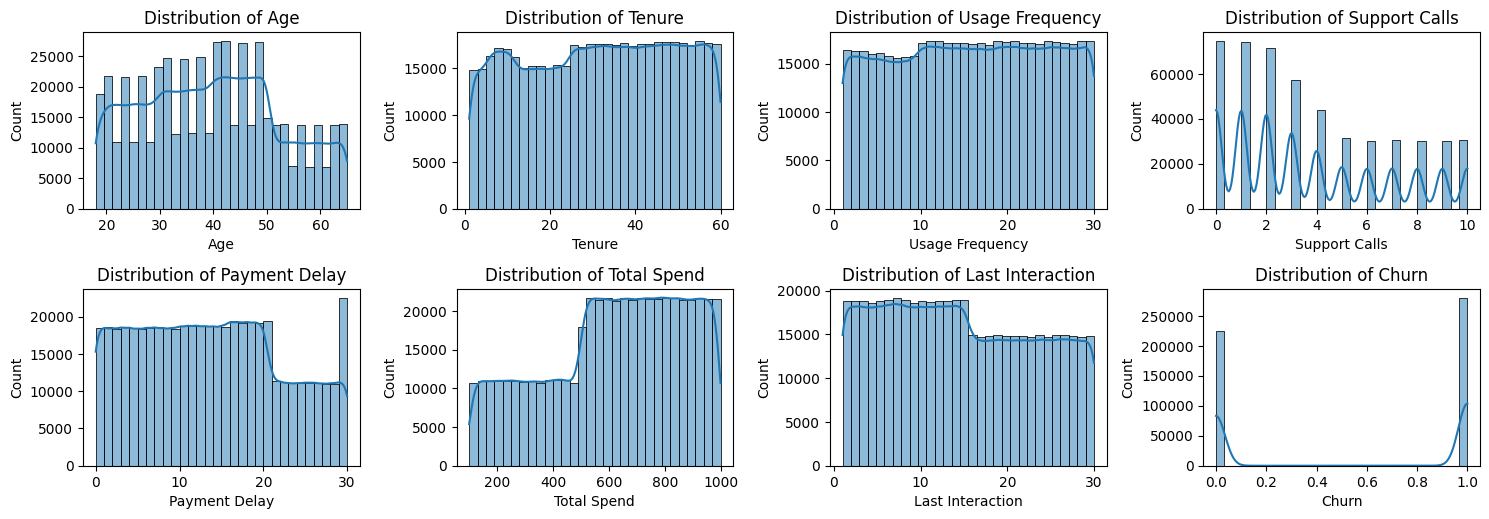

In [4]:
# 2. Exploratory Data Analysis (EDA).
# Visualize Feature Distributions.
# Histograms for numerical features.

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

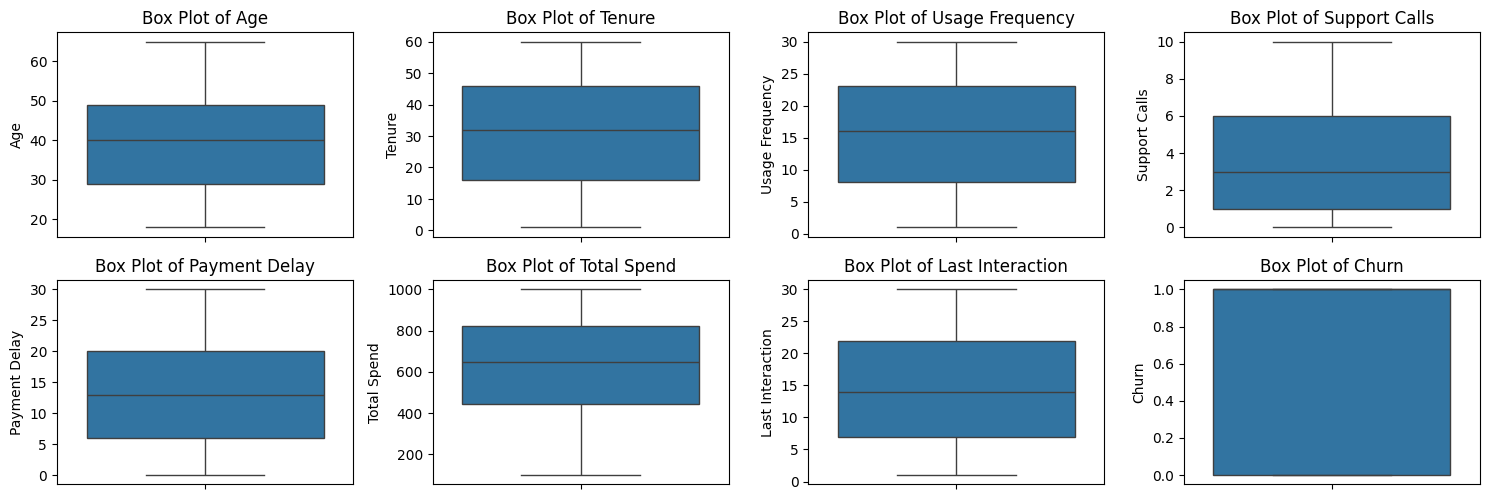

In [5]:
# Box plots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

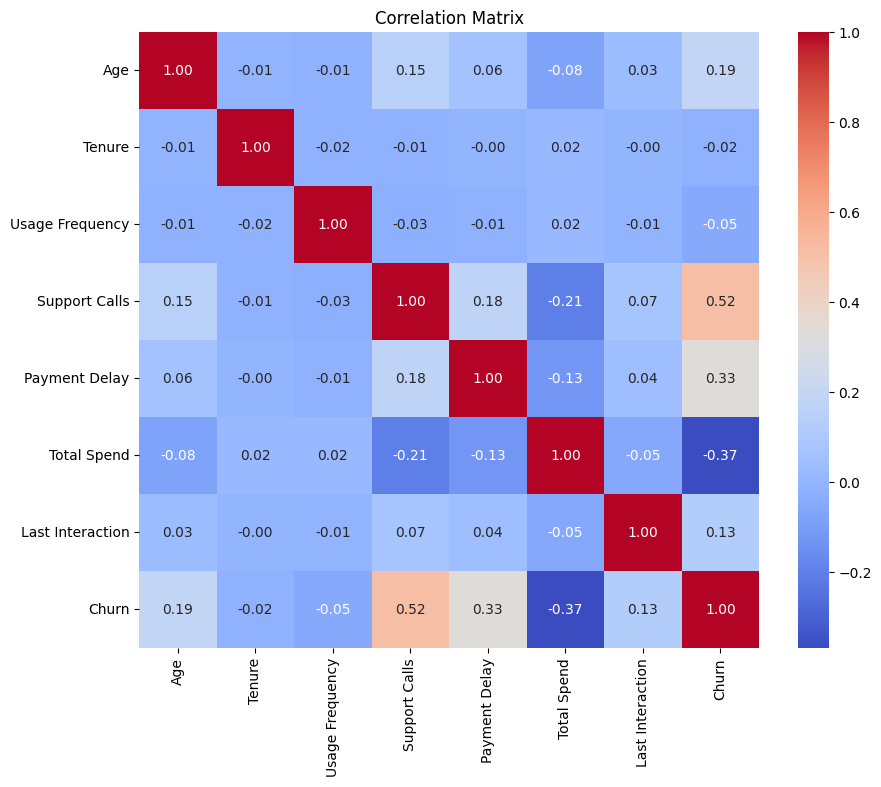

In [6]:
# Correlation Matrix.
# Correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

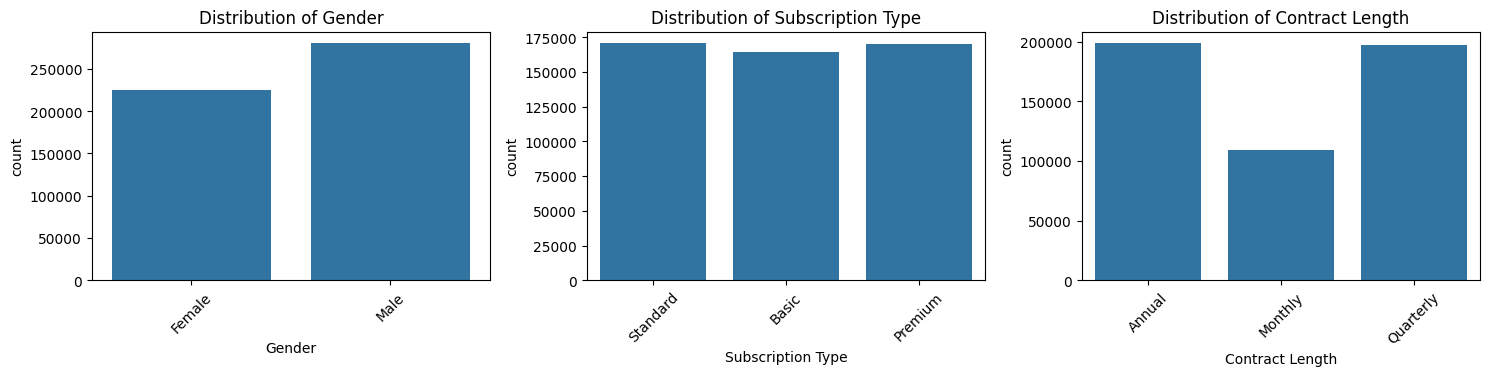

In [7]:
# Categorical Data Analysis.
# Bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

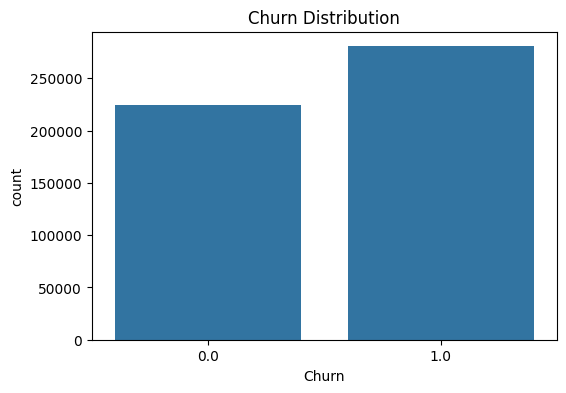

In [8]:
# Churn Distribution.
# Analyze churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [9]:
# 3. Preprocessing Steps.
# Encode Categorical Variables.
# Label encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
# Feature Scaling.
# Normalize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
# Split the Data.
# Define features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Convert the target variable to binary (0 or 1) using a threshold.
# For example, if 'Churn' represents a probability, you might use a threshold of 0.5:
y = (y > 0.5).astype(int)  # Assuming values above 0.5 indicate churn

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404164, 10), (404164,), (101042, 10), (101042,))

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Handle class imbalance
neg, pos = y_train.value_counts()
scale = neg / pos

# Train XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     44943
           1       0.90      1.00      0.94     56099

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.93    101042

Confusion Matrix:
[[38597  6346]
 [  208 55891]]
Accuracy: 0.9351358840878051
ROC AUC Score: 0.9533328744987773


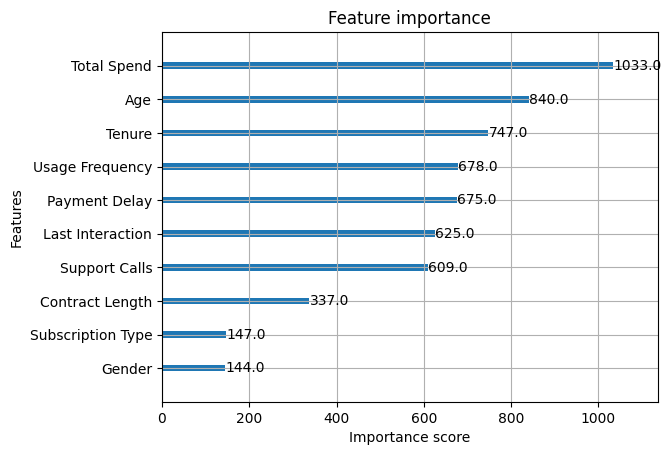

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_clf, max_num_features=10)
plt.show()


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC:", scores.mean())


Cross-validated ROC AUC: 0.9406978940333722


In [16]:
import joblib
joblib.dump(xgb_clf, 'churn_model.pkl')


['churn_model.pkl']